In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
df = pd.read_csv("Hyderbad_House_price.csv")

In [98]:
df.head()

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [99]:
df.isnull().sum()

Unnamed: 0         0
title              0
location           0
price(L)           0
rate_persqft       0
area_insqft        0
building_status    0
dtype: int64

In [100]:
df.columns

Index(['Unnamed: 0', 'title', 'location', 'price(L)', 'rate_persqft',
       'area_insqft', 'building_status'],
      dtype='object')

In [101]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [102]:
df.dtypes

title               object
location            object
price(L)           float64
rate_persqft         int64
area_insqft          int64
building_status     object
dtype: object

In [103]:
from sklearn.model_selection import train_test_split
X = df.drop('price(L)', axis=1)
y = df['price(L)']
x_train,x_test,y_train,y_test = train_test_split(X,y, random_state=10, test_size=0.20)

In [104]:
print(x_test.isnull().sum())


title              0
location           0
rate_persqft       0
area_insqft        0
building_status    0
dtype: int64


In [105]:
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status
0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction


In [106]:
categorical_cols = []
numerical_cols = []
for col in X.columns:
    if df[col].dtype=="object":
        categorical_cols.append(col)
    else:
        if col!="price(L)":
            numerical_cols.append(col)
print(categorical_cols, numerical_cols)

['title', 'location', 'building_status'] ['rate_persqft', 'area_insqft']


In [107]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", drop='first')
x_train_encoded = encoder.fit_transform(x_train[categorical_cols])
x_test_encoded = encoder.transform(x_test[categorical_cols])
print("x_test_encoded",x_test_encoded)

x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
x_test_encoded_df = pd.DataFrame(x_test_encoded,columns=encoder.get_feature_names_out(categorical_cols))

scaler = StandardScaler()
x_train_scaled_df = pd.DataFrame(scaler.fit_transform(x_train[numerical_cols]), columns=numerical_cols)
x_test_scaled_df = pd.DataFrame(scaler.transform(x_test[numerical_cols]), columns=numerical_cols)

x_final_train = pd.concat([x_train_scaled_df, x_train_encoded_df], axis=1)
x_final_test = pd.concat([x_test_scaled_df, x_test_encoded_df],axis=1)





x_test_encoded [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


c:\Users\saies\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [108]:
x_final_train.isnull().sum()

rate_persqft                          0
area_insqft                           0
title_1 BHK Independent House         0
title_1 RK Studio Apartment           0
title_10 BHK Independent House        0
                                     ..
location_muthangi                     0
location_raidurgam                    0
building_status_Ready to move         0
building_status_Resale                0
building_status_Under Construction    0
Length: 359, dtype: int64

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_final_train,y_train)
y_pred_test = model.predict(x_final_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score
print("mse", mean_squared_error(y_test,y_pred_test))
print("mae", mean_absolute_error(y_test,y_pred_test))
print("rmse",np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("r square", r2_score(y_test,y_pred_test))

mse 13919.771273019021
mae 41.48623399988824
rmse 117.98208030467602
r square 0.7670292843239402


In [111]:
test_score = model.score(x_final_test, y_test)
print(test_score)

0.7670292843239402


In [112]:
train_score = model.score(x_final_train, y_train)
print(train_score)

0.8408981303899596


In [113]:
x_final_train.isnull().sum()


rate_persqft                          0
area_insqft                           0
title_1 BHK Independent House         0
title_1 RK Studio Apartment           0
title_10 BHK Independent House        0
                                     ..
location_muthangi                     0
location_raidurgam                    0
building_status_Ready to move         0
building_status_Resale                0
building_status_Under Construction    0
Length: 359, dtype: int64

In [114]:
x_final_test.isnull().sum()

rate_persqft                          0
area_insqft                           0
title_1 BHK Independent House         0
title_1 RK Studio Apartment           0
title_10 BHK Independent House        0
                                     ..
location_muthangi                     0
location_raidurgam                    0
building_status_Ready to move         0
building_status_Resale                0
building_status_Under Construction    0
Length: 359, dtype: int64

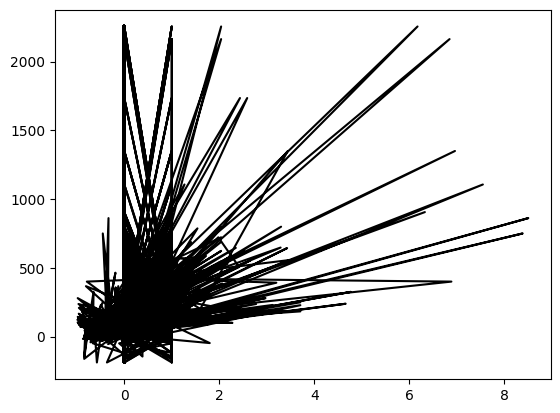

In [115]:
plt.plot(x_final_test, y_pred_test, color ='k')

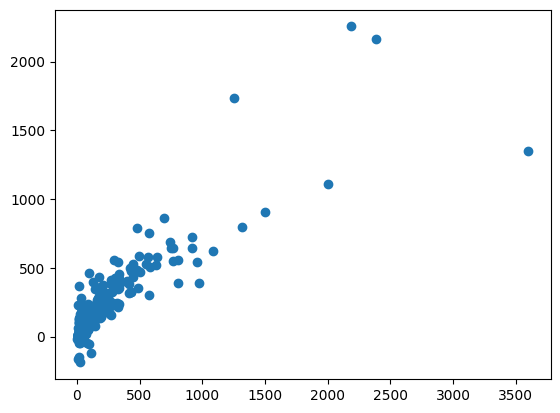

In [116]:
plt.scatter(y_test,y_pred_test)

In [117]:
residual = y_test-y_pred_test

In [118]:
residual

2283     -9.987709
176      -5.932750
2321     19.357893
3111   -176.129920
1783     16.231806
           ...    
3548    -88.566946
1380     10.305033
28      -14.425221
66       15.589870
3050      7.854285
Name: price(L), Length: 732, dtype: float64

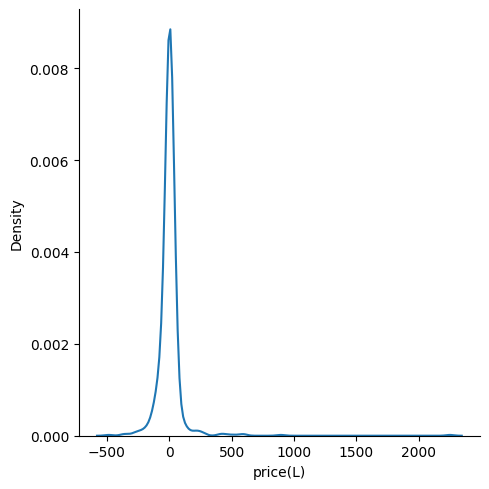

In [119]:
import seaborn as sns 
sns.displot(residual,kind="kde")

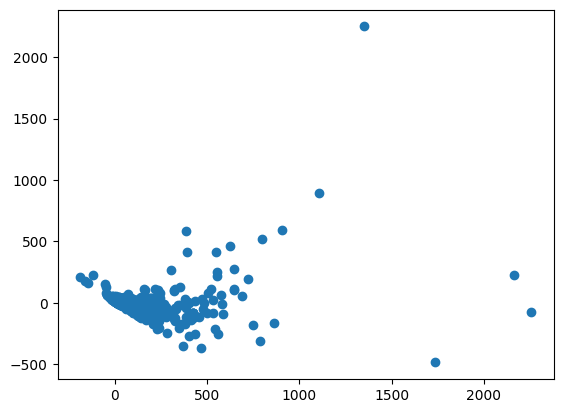

In [121]:
plt.scatter(y_pred_test,residual)

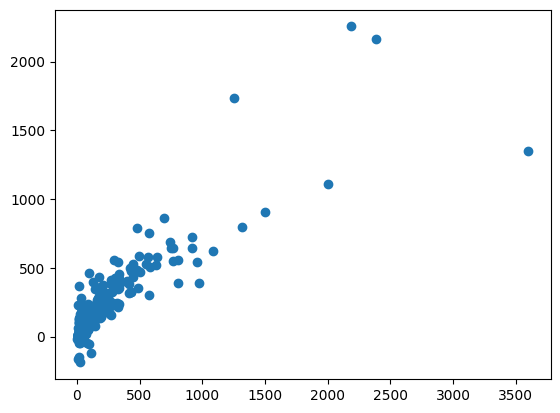

In [124]:
plt.scatter(y_test,y_pred_test)

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

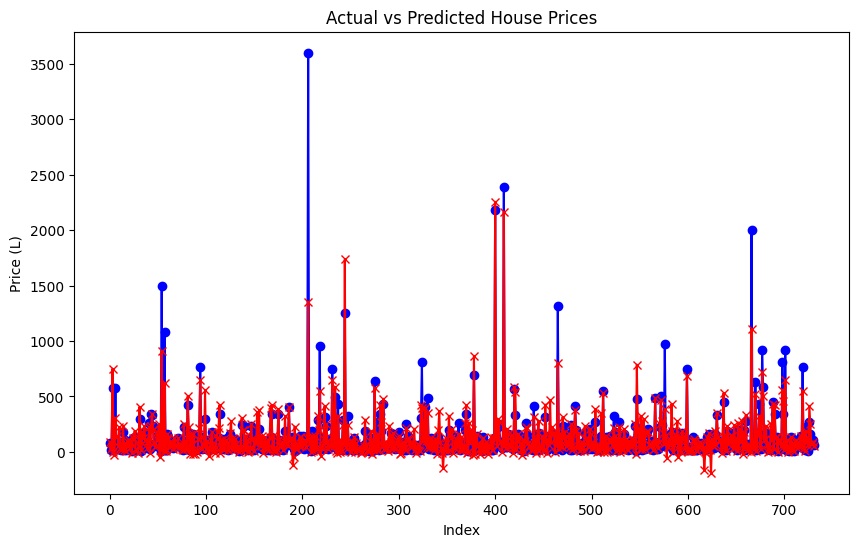

In [130]:
y_test_array = np.array(y_test)
y_pred_array = np.array(y_pred_test)

# Create an index array to maintain the order
indices = np.arange(len(y_test_array))

# 📌 Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test_array, label="Actual Prices", color="blue", linestyle="-", marker="o")
plt.plot(indices, y_pred_array, label="Predicted Prices", color="red", linestyle="-", marker="x")

plt.xlabel("Index")
plt.ylabel("Price (L)")
plt.title("Actual vs Predicted House Prices")

Text(0.5, 1.0, 'Distribution of Residuals (Actual - Predicted)')

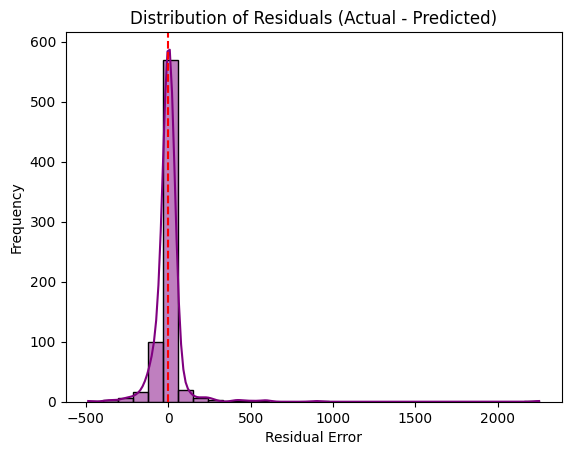

In [128]:
sns.histplot(residual, bins=30, kde=True, color="purple")
plt.axvline(x=0, color='red', linestyle='--', label="Zero Error Line")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (Actual - Predicted)")